In [1]:
# ============================================================================
# STEP 1: ENVIRONMENT SETUP
# ============================================================================
# Load environment variables and initialize Google Earth Engine

from dotenv import load_dotenv
load_dotenv()

import ee, eemont
from forestry_carbon_arr.core import ForestryCarbonARR
from forestry_carbon_arr.utils.zarr_utils import save_dataset_efficient_zarr, load_dataset_zarr

import gcsfs
import os

fs = gcsfs.GCSFileSystem(project=os.getenv("GOOGLE_CLOUD_PROJECT"), token='/usr/src/app/user_id.json')

forestry = ForestryCarbonARR(config_path='./00_input/korindo.json')
forestry.initialize_gee()

✓ GEE Initialized successfully
  Credentials Path: /usr/src/app/user_id.json - loaded successfully


In [2]:
# ============================================================================
# STEP 2: LOAD AREA OF INTEREST (AOI) but only on the AOI concession
# ============================================================================
# Load the area of interest geometry for reference

from forestry_carbon_arr.core.utils import DataUtils
import geopandas as gpd
import geemap

data_utils = DataUtils(forestry.config, use_gee=True)
aoi_gpd, aoi_ee = data_utils.load_geodataframe_gee('./00_input/korindo_buffer.shp')

aoi_gpd_utm = aoi_gpd.to_crs(epsg=32749)

print(f"✅ AOI loaded: {len(aoi_gpd_utm)} features")
print(f"   Area: {aoi_gpd_utm.geometry.area.sum()/10000:.2f} hectares")

✅ AOI loaded: 1 features
   Area: 40740.66 hectares


In [ ]:
# ### ts fresh historical deforestation, and current forest, tsfresh
# tsfresh_pred_result = forestry.config['tsfresh_pred_result']
# lc_pred_result = forestry.config['lc_pred_result']

# ds_tsfresh = load_dataset_zarr(tsfresh_pred_result)
# ds_lc = load_dataset_zarr(lc_pred_result)

In [4]:
# from forestry_carbon_arr import plot_unstack_ds

# ## palette for tsfresh
# palette_class_segment_tsfresh = {
#     0: '#fc0303',   # not-eligible
#     1: '#03fcb1'  # eligible
# }

# # Custom palette for land-cover classes (1..14)
# palette_class_segment_landcover = {
#     1: '#83ff5a',   # forest_trees (1)
#     2: '#ffe3b3',   # shrubland (2)
#     3: '#ffff33',   # grassland (3)
#     4: '#f89696',   # openland (4)
#     5: '#1900ff',   # waterbody_waterlogged (5)
#     6: '#e6e6fa',   # plantation (6)
#     7: '#FFFFFF',   # gray_infrastructure (7)
#     8: '#4B0082',   # oil_palm (8)
#     9: '#8B4513',   # cropland (9)
#     10: '#87CEEB',  # waterbody (10)
#     11: '#2F4F4F',  # wetlands (11)
#     12: '#ADFF2F',  # forest_trees_regrowth (12)
#     13: '#8B0000',  # historical_treeloss_10years (13)
#     14: '#DAA520',  # paddy_irrigated (14),
# }

# # Derived mapping ready for plot_unstack_ds(cmap_custom=...)
# cmap_custom_tsfresh = {cid: hexcolor for cid, hexcolor in palette_class_segment_tsfresh.items()}
# print("cmap_custom defined for classes tsfresh:", sorted(cmap_custom_tsfresh.keys()))

# cmap_custom_landcover = {cid: hexcolor for cid, hexcolor in palette_class_segment_landcover.items()}
# print("cmap_custom defined for classes landcover:", sorted(cmap_custom_landcover.keys()))

In [5]:
# ds_tsfresh = ds_tsfresh.assign_attrs(
#     crs=forestry.config['output_crs']
# )

In [6]:
# plot_unstack_ds(ds_tsfresh,y=True,y_var='y_pred',cmap_custom=cmap_custom_tsfresh)

In [7]:
# ds_lc

In [8]:
# plot_unstack_ds(ds_lc,y=True,y_var='pred_class',cmap_custom=cmap_custom_landcover)

In [9]:
# ## Re-read inference results - to re-check the results
# from forestry_carbon_arr import load_model, save_config_ml, predict_dataset_features

# # Load from local cache using config hash (optionally a timestamp)
# # model, path, cfg = load_model(config=config, timestamp="20250101_120000")

# model_tsfresh, path_tsfresh, cfg_tsfresh = load_model(
#     gcs_model_path=forestry.config['cbm_tsfresh_path'],
#     gcs_config_path=forestry.config['cbm_tsfresh_config'],
# )

# # Load model and config directly from GCS
# model_lc, path_lc, cfg_lc = load_model(
#     gcs_model_path=forestry.config['cbm_lc_path'],
#     gcs_config_path=forestry.config['cbm_lc_config'],
# )

# # if we want to alter the config later
# # class_label_map = {
# #                 1: 'forest_trees',
# #                 2: 'shrubland',
# #                 3: 'grassland',
# #                 4: 'openland',
# #                 5: 'waterbody_waterlogged',
# #                 6: 'plantation',
# #                 7: 'gray_infrastructure',
# #                 8: 'oil_palm',
# #                 9: 'cropland',
# #                 # 10:'waterbody',
# #                 # 14: 'paddy_irrigated',
# #             }

# # # Prepare configuration with unique hash
# # # Note: We're using class_weights (set above using optimal_weights) to handle class imbalance
# # #       This is more effective than sample weights for this use case
# # cfg_lc['label_map'] = class_label_map

# # X_features_list = ds_lc.feature.values

# # cfg_lc['X_features_list'] = list(X_features_list)

# # cfg_tsfresh['X_features_list'] = list(ds_tsfresh.features.values)

# # local_cfg_path = save_config_ml(
# #     cfg_tsfresh,
# #     gcs_path=forestry.config['cbm_tsfresh_config']  # optional upload
# # )
# # print("Saved config to:", local_cfg_path)

In [10]:
# ds_tsfresh
# cfg_tsfresh

In [11]:
# From the saved config
# print("label_map:", cfg_lc.get("label_map"))

In [12]:
# len(cfg_lc.get("X_features_list"))

In [13]:
# cfg_lc


In [14]:
# import importlib
# import forestry_carbon_arr
# import forestry_carbon_arr.ML.inference as fc_infer
# import forestry_carbon_arr.ML.catboost_workflow as fc_cb
# import forestry_carbon_arr.ML.vis as fc_vis

# # Reload the top-level package (optional but helps refresh __all__)
# importlib.reload(forestry_carbon_arr)

# # Reload specific modules you’re using
# importlib.reload(fc_infer)
# importlib.reload(fc_cb)
# importlib.reload(fc_vis)

# # After reload, re-import the symbols you need
# from forestry_carbon_arr import predict_dataset_features, load_model, save_config_ml, plot_unstack_ds

In [15]:
# import importlib, forestry_carbon_arr.ML.inference as fc_infer
# importlib.reload(fc_infer)
# from forestry_carbon_arr import predict_dataset_features

# # ds tsfresh test - re-run inference
# ds_tsfresh_test = ds_tsfresh.drop_vars(['y_pred'])
# ds_tsfresh_test = ds_tsfresh_test.rename({'features':'feature'})
# # ds_tsfresh_test

# preds, cx, cy = predict_dataset_features(
#     model_tsfresh,
#     ds_tsfresh_test,
#     cfg_tsfresh,
#     chunk_size=1000_000,
# )

In [16]:
# ds_tsfresh_test['y_pred'] =('sample', preds)
# ds_tsfresh_test

# # Optional: map numeric IDs to labels if label_map is present

In [17]:
# plot_unstack_ds(ds_tsfresh_test,y=True,y_var='y_pred',cmap_custom=cmap_custom_tsfresh)

In [18]:
# ds_lc

In [19]:
# import importlib, forestry_carbon_arr, forestry_carbon_arr.ML.inference as fc_infer 
# importlib.reload(fc_infer)          # reload the inference module
# importlib.reload(forestry_carbon_arr)  # optional: reload package __init__
# # from forestry_carbon_arr import predict_dataset_features


# # ds tsfresh test - re-run inference
# ds_lc_test = ds_lc.drop_vars(['pred_class'])
# # ds_lc_test = ds_lc_test.rename({'features':'feature'})
# # ds_lc_test

# # preds_lc, cx_lc, cy_lc = predict_dataset_features(
# preds_lc, cx_lc, cy_lc = fc_infer.predict_dataset_features(
#     model_lc,
#     ds_lc_test,
#     cfg_lc,
#     chunk_size=1000_000,
# )

In [20]:
# preds_lc
# ## flatten in np
# # if preds_lc.ndim == 2 and preds_lc.shape[1] == 1:
# #     pred_classes = preds_lc[:, 0]  # squeeze
# # elif preds_lc.ndim == 2 and preds_lc.shape[1] > 1:
# #     pred_classes = preds_lc.argmax(axis=1)  # if probs

# # pred_classes

# # or
# # pred_classes = preds_lc.reshape(-1)

In [21]:
# ds_lc_test

In [22]:
# ds_lc_test['pred_class'] =('sample', preds_lc)
# plot_unstack_ds(ds_lc_test,y=True,y_var='pred_class',cmap_custom=cmap_custom_landcover)

In [23]:
# ds_lc_test
# ds_tsfresh_test

In [24]:
# ## merging the ds but only extract the important columns (y_pred, pred_class)
# import xarray as xr
# # do first for el - tsfresh

# tsfresh_da= ds_tsfresh.y_pred

# ds_tsfresh_unstack = (
#     tsfresh_da.assign_coords(
#         coord_x=("sample", ds_tsfresh.coord_x.data),
#         coord_y=("sample", ds_tsfresh.coord_y.data),
#     )
#     .set_index(sample=("coord_y", "coord_x"))  # build MultiIndex on existing sample
#     .unstack("sample")                          # becomes dims coord_y, coord_x
#     .rename(coord_y="y", coord_x="x")
#     .rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=False)
#     .rio.write_crs(ds_tsfresh.rio.crs, inplace=False)
#     .to_dataset(name="el_tsfresh")
# )
# ds_tsfresh_unstack

In [25]:
# from rasterio.enums import Resampling

# # ds dataset to rio with crs
# ds_tsfresh_unstack = ds_tsfresh_unstack.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=False)
# ds_tsfresh_unstack = ds_tsfresh_unstack.rio.write_crs(ds_tsfresh.rio.crs or ds_tsfresh.attrs["crs"], inplace=False)
# ds_lc_unstack = ds_lc_unstack.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=False)
# ds_lc_unstack = ds_lc_unstack.rio.write_crs(ds_lc.rio.crs or ds_lc.attrs["crs"], inplace=False)

# # Overlay processing
# ds_overlay = ds_tsfresh_unstack.rio.reproject_match(ds_lc_unstack, resampling=Resampling.nearest)
# merged = xr.merge([ds_overlay, ds_lc_unstack])

In [26]:
# merged

In [27]:
## testing the merge again
# merged["el_tsfresh"].plot.imshow()

In [28]:
# merged["lc_class"].plot.imshow()

In [29]:
# import numpy as np

# #tsfresh = 0, then it is 10-years_deforestation_No-Go-Zone (ineligible)
# #tsfresh = 1, then it is eligible, and mark the LC_Go-Zone

# # eligibility land cover: in this class
# list_lc_eligible_arr = [2,3,4,9]
# list_lc_not_eligible_arr = [1,5,6,7,8]
# #                 1: 'forest_trees',
# #                 2: 'shrubland',
# #                 3: 'grassland',
# #                 4: 'openland',
# #                 5: 'waterbody_waterlogged',
# #                 6: 'plantation',
# #                 7: 'gray_infrastructure',
# #                 8: 'oil_palm',
# #                 9: 'cropland'

# # class_name_map = {
# #     1: 'Forest_Trees_Go-Zone',
# #     2: 'Shrubland_Go-Zone',
# #     3: 'Grassland_Go-Zone',
# #     4: 'Openland_Go-Zone',
# #     5: 'Waterbody_No-Go-Zone',
# #     6: 'Plantation_No_Go-Zone',
# #     7: 'Infrastructure_No_Go-Zone',
# #     8: 'Oil_Palm_No_Go-Zone',
# #     9: 'Cropland_Go-Zone',
# #     10: '10-years_deforestation_No-Go-Zone', #el tsfresh =0
# #     }
# ## logic:
# # find the lc in go zone based on list,
# # if overlay with tsfresh = 0, then it is 10-years_deforestation_No-Go-Zone
# # else if overlay with tsfresh = 1, then it is eligible, and mark the LC_Go-Zone

In [30]:
# # 1 = eligible LC, 0 = not eligible LC
# el_lc = xr.where(merged.lc_class.isin(list_lc_eligible_arr), 1, 0).rename("el_lc")
# el_tsfresh = merged.el_tsfresh

# # Eligible only if both are 1
# cond = (el_lc == 1) & (el_tsfresh == 1)
# nan_mask = el_lc.isnull() | el_tsfresh.isnull()

# eligibility_arr = xr.where(nan_mask, np.nan, xr.where(cond, 1, 0)).rename("eligibility_arr")
# eligibility_arr

In [31]:
# merged = merged.assign(el_lc=el_lc, eligibility_arr=eligibility_arr)
# merged

In [32]:
# merged.eligibility_arr.plot.imshow()

In [33]:
# # Recreate zone_class (tsfresh + LC overlay)
# # Rules:
# # - tsfresh == 0 -> 10 (10-years deforestation No-Go)
# # - tsfresh == 1 -> keep LC class codes 1..9

# lc = merged.lc_class
# el = merged.el_tsfresh
# subtype_zone = xr.full_like(lc, np.nan, dtype=np.float32)

# # tsfresh == 0 -> no-go code 10
# subtype_zone = xr.where((el == 0) & (lc == 1), 1, subtype_zone) # exception, for forest only based on planet satellite

# subtype_zone = xr.where((el == 0) & (lc != 1), 10, subtype_zone) # exception, for forest only based on planet satellite

# # tsfresh == 1 -> assign lc classes
# for cls in [1,2, 3, 4, 5, 6, 7, 8, 9]:
#     subtype_zone = xr.where((el == 1) & (lc == cls), cls, subtype_zone)

# subtype_zone = subtype_zone.rename("zone_class")
# subtype_zone


In [34]:
# # Create subtype_zone labels (string) from zone_class codes
# class_name_map = {
#     1: "Forest_Trees_Go-Zone",
#     2: "Shrubland_Go-Zone",
#     3: "Grassland_Go-Zone",
#     4: "Openland_Go-Zone",
#     5: "Waterbody_No-Go-Zone",
#     6: "Plantation_No_Go-Zone",
#     7: "Infrastructure_No_Go-Zone",
#     8: "Oil_Palm_No_Go-Zone",
#     9: "Cropland_Go-Zone",
#     10: "10-years_deforestation_No-Go-Zone",
# }

# # subtype_zone_da = xr.apply_ufunc(
# #     lambda v: class_name_map.get(int(v), np.nan) if np.isfinite(v) else np.nan,
# #     subtype_zone,
# #     vectorize=True,
# #     dask="parallelized",
# #     output_dtypes=[object],
# # ).rename("subtype_zone")

# subtype_zone_da = subtype_zone.rename("subtype_zone")
# subtype_zone_da


In [35]:
# np.unique(subtype_zone_da.values)

In [36]:
# final_ds = merged.assign(subtype_zone=subtype_zone_da)
# final_ds.attrs["subtype_zone"] = class_name_map
# final_ds = final_ds.assign_attrs(crs=forestry.config['output_crs'])
# final_ds

In [37]:
# final_ds.subtype_zone.plot.imshow()

In [38]:
# ### SAVE THE DS
# zarr_path = 'gs://remote_sensing_saas/01-korindo/final_zone/final_ds.zarr'
# save_dataset_efficient_zarr(final_ds, zarr_path,overwrite=True, chunk_sizes={'x': 512, 'y': 512})

In [39]:
import rasterio
import numpy as np
import pandas as pd

# Export multiband GeoTIFF (numeric bands only) to GCS
# name_to_code = {v: k for k, v in class_name_map.items()}

def convert_to_geotiff(ds, band_list, gcs_out, nodata_val=-9999, dtype="int16", extra_attrs=None):
    """Export selected bands to GeoTIFF and upload to GCS. Keeps your comments intact."""
    extra_attrs = extra_attrs or {}

    bands = {}
    # bands = {
    #     "el_tsfresh": final_ds.el_tsfresh,
    #     "lc_class": final_ds.lc_class,
    #     "el_lc": final_ds.el_lc,
    #     "eligibility_arr": final_ds.eligibility_arr,
    #     "subtype_zone_code": final_ds.subtype_zone,
    # }
    for name in band_list:
        if name == "subtype_zone_code":  # encode strings to codes
            bands[name] = xr.apply_ufunc(
                lambda v: nodata_val if pd.isna(v) else name_to_code.get(str(v), nodata_val),
                ds.subtype_zone,
                vectorize=True,
                dask="parallelized",
                output_dtypes=[np.int16],
            )
        else:
            bands[name] = ds[name]

    bands_clean = {
        k: v.fillna(nodata_val).astype(dtype).rio.write_nodata(nodata_val)
        for k, v in bands.items()
    }

    stack = xr.concat(
        [bands_clean[k] for k in bands_clean],
        dim="band",
    ).assign_coords(band=list(bands_clean.keys()))

    # carry nodata in metadata for clarity
    stack = stack.assign_attrs(nodata=nodata_val, **extra_attrs)
    stack = stack.rio.write_crs(ds.rio.crs, inplace=False)
    local_out = "/tmp/final_ds.tif"
    stack.rio.to_raster(local_out, driver="GTiff", compress="DEFLATE")

    with rasterio.open(local_out, "r+") as dst:
        dst.descriptions = list(bands_clean.keys())  # ['el_tsfresh', 'lc_class', ...]

    # Upload to GCS
    fs.put(local_out, gcs_out)
    print("uploaded to", gcs_out)


# convert_to_geotiff(
#     final_ds,
#     ["el_tsfresh", "lc_class", "el_lc", "eligibility_arr", "subtype_zone_code"],
#     gcs_out="gs://remote_sensing_saas/01-korindo/final_zone/final_ds.tif",
#     extra_attrs={"subtype_zone_map": class_name_map},
# )


In [40]:
## save data
zarr_path = 'gs://remote_sensing_saas/01-korindo/tsfresh_model_catboost/ds_features_all_aoi.zarr'
ds_ml_aoi_tsfresh = load_dataset_zarr(zarr_path)
print(ds_ml_aoi_tsfresh)

📂 Loading dataset from GCS zarr: gs://remote_sensing_saas/01-korindo/tsfresh_model_catboost/ds_features_all_aoi.zarr
✅ Dataset loaded: {'sample': 4073658, 'features': 197}
<xarray.Dataset> Size: 7GB
Dimensions:     (sample: 4073658, features: 197)
Coordinates:
  * features    (features) <U68 54kB 'EVI__fft_coefficient__attr_"angle"__coe...
  * sample      (sample) int64 33MB 0 1 2 3 ... 4073654 4073655 4073656 4073657
Data variables:
    coord_x     (sample) float64 33MB dask.array<chunksize=(100000,), meta=np.ndarray>
    coord_y     (sample) float64 33MB dask.array<chunksize=(100000,), meta=np.ndarray>
    plot_id     (sample) object 33MB dask.array<chunksize=(509208,), meta=np.ndarray>
    X_features  (sample, features) float64 6GB dask.array<chunksize=(100000, 197), meta=np.ndarray>


/usr/src/app/forestry_carbon_arr/utils/zarr_utils.py:855: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"✅ Dataset loaded: {dict(ds.dims)}")


In [46]:
import xarray as xr
import numpy as np
from rasterio.transform import Affine


def unstack_from_ds_sample(ds, var="X_features", crs=None, transform=None, nodata=-9999):
    """Unstack a sample-based dataset back to y/x grid and return a Dataset."""
    da = ds[var].assign_coords(
        x=("sample", ds.coord_x.values),
        y=("sample", ds.coord_y.values),
    )

    da_grid = (
        da
        .set_index(sample=("y", "x"))
        .unstack("sample")
        .rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=False)
    )

    if crs is not None:
        da_grid = da_grid.rio.write_crs(crs, inplace=False)
    if isinstance(transform, Affine):
        da_grid = da_grid.rio.write_transform(transform, inplace=False)

    return da_grid.to_dataset(name=var)

# Example usage: provide real Affine if available
grid_ds = unstack_from_ds_sample(
    ds_ml_aoi_tsfresh,
    var="X_features",
    crs=ds_ml_aoi_tsfresh.attrs.get("crs"),
    transform=None,
)
grid_ds


<xarray.Dataset> Size: 104MB
Dimensions:     (y: 2907, x: 4489)
Coordinates:
  * y           (y) float64 23kB 9.949e+06 9.949e+06 ... 9.982e+06 9.982e+06
  * x           (x) float64 36kB 5.786e+05 5.786e+05 ... 6.235e+05 6.235e+05
    features    <U68 272B 'EVI__fft_coefficient__attr_"angle"__coeff_5'
Data variables:
    X_features  (y, x) float64 104MB dask.array<chunksize=(22, 4489), meta=np.ndarray>

In [50]:
convert_to_geotiff(
    grid_ds.rio.write_crs("EPSG:32749", inplace=False).isel(features=0),
    ["X_features"],
    gcs_out="gs://remote_sensing_saas/01-korindo/final_zone/test.tif",
    # extra_attrs={"subtype_zone_map": class_name_map},
)

uploaded to gs://remote_sensing_saas/01-korindo/final_zone/test.tif


In [52]:
zarr_filtered_path = f"gs://remote_sensing_saas/01-korindo/timeseries_zarr/ds_filtered_aoi_korindo_buffer.zarr"
ds_filtered_aoi = load_dataset_zarr(zarr_filtered_path, storage='gcs')
ds_filtered_aoi

📂 Loading dataset from GCS zarr: gs://remote_sensing_saas/01-korindo/timeseries_zarr/ds_filtered_aoi_korindo_buffer.zarr
✅ Dataset loaded: {'time': 11, 'x': 4489, 'y': 3213}


/usr/src/app/forestry_carbon_arr/utils/zarr_utils.py:855: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"✅ Dataset loaded: {dict(ds.dims)}")


<xarray.Dataset> Size: 4GB
Dimensions:  (time: 11, x: 4489, y: 3213)
Coordinates:
  * time     (time) datetime64[ns] 88B 2015-12-31 2016-12-31 ... 2025-12-31
  * x        (x) float64 36kB 5.786e+05 5.786e+05 ... 6.235e+05 6.235e+05
  * y        (y) float64 26kB 9.982e+06 9.982e+06 ... 9.949e+06 9.949e+06
Data variables:
    EVI      (time, x, y) float32 635MB dask.array<chunksize=(11, 128, 128), meta=np.ndarray>
    FCD      (time, x, y) float32 635MB dask.array<chunksize=(11, 128, 128), meta=np.ndarray>
    GNDVI    (time, x, y) float32 635MB dask.array<chunksize=(11, 128, 128), meta=np.ndarray>
    NBR      (time, x, y) float32 635MB dask.array<chunksize=(11, 128, 128), meta=np.ndarray>
    NDVI     (time, x, y) float32 635MB dask.array<chunksize=(11, 128, 128), meta=np.ndarray>
    SAVI     (time, x, y) float32 635MB dask.array<chunksize=(11, 128, 128), meta=np.ndarray>
Attributes:
    crs:      EPSG:32749

In [57]:
ds_filtered_aoi.isel(time=10)

<xarray.Dataset> Size: 346MB
Dimensions:  (x: 4489, y: 3213)
Coordinates:
    time     datetime64[ns] 8B 2025-12-31
  * x        (x) float64 36kB 5.786e+05 5.786e+05 ... 6.235e+05 6.235e+05
  * y        (y) float64 26kB 9.982e+06 9.982e+06 ... 9.949e+06 9.949e+06
Data variables:
    EVI      (x, y) float32 58MB dask.array<chunksize=(128, 128), meta=np.ndarray>
    FCD      (x, y) float32 58MB dask.array<chunksize=(128, 128), meta=np.ndarray>
    GNDVI    (x, y) float32 58MB dask.array<chunksize=(128, 128), meta=np.ndarray>
    NBR      (x, y) float32 58MB dask.array<chunksize=(128, 128), meta=np.ndarray>
    NDVI     (x, y) float32 58MB dask.array<chunksize=(128, 128), meta=np.ndarray>
    SAVI     (x, y) float32 58MB dask.array<chunksize=(128, 128), meta=np.ndarray>
Attributes:
    crs:      EPSG:32749

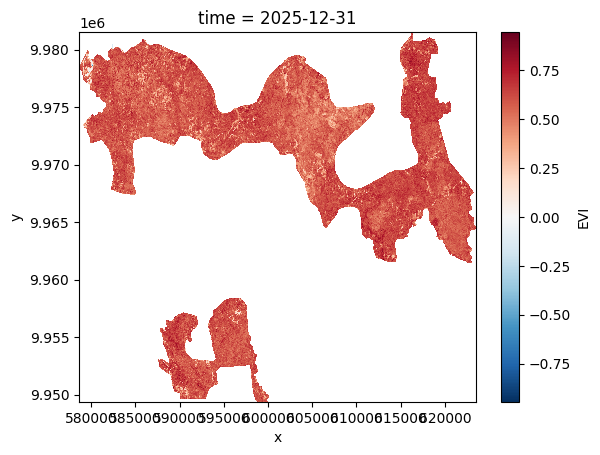

: 

In [ ]:
ds_filtered_aoi.isel(time=10).EVI.transpose("y", "x").plot.imshow()

In [ ]:
ds_filtered_aoi

In [58]:
convert_to_geotiff(
    ds_filtered_aoi.isel(time=10).rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=False).transpose("y", "x"),
    ["EVI"],
    gcs_out="gs://remote_sensing_saas/01-korindo/final_zone/testdddd.tif",
    # extra_attrs={"subtype_zone_map": class_name_map},
)

uploaded to gs://remote_sensing_saas/01-korindo/final_zone/testdddd.tif
